<a href="https://colab.research.google.com/github/Deepak-Mewada/CAMP/blob/main/neuron_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuron Tutorial 1: Scripting

## What can we model?

Neuron can model electrical properties of neurons which can take the form of:
    
- Single compartment or Multi compartment neuron
- Stylized or Anatomically detailed geometry
- Artificial Spiking Cells (e.g IntFire)
- Networks

Neuron also has a reaction diffusion module that can model diffusion, buffers, transport and exchange.

## From Concept to Model

To model a realistic cell, Neuron conceptualize it by breaking it up into individual **sections**. A **section** is an unbranched cable with uniform _qualitative_ electrical properties. A **section** has a diameter, length and nseg property. nseg is a further division of section.

<img src="images/section.png" alt="Alt text" title="Title text" />

<!-- ![section]("./section.png") -->

Each section can be divided into one or more individual **segments**. At the center of each **segment** the cable equation is integrated to compute the voltage.

<img src="images/segments.png" alt="Alt text" title="Title text" />

## How to Interface with NEURON

<img src="images/neuronsim.png" alt="Alt text" title="Title text" />


## How to Interface with NEURON

<img src="images/neuron_internal.jpg" alt="Alt text" title="Title text" />


In [ ]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 46.7 MB/s eta 0:00:00


In [ ]:
!nrnivmodl

/content
Mod files: "./hh_custom.mod"

 -> Compiling mod_func.cpp
 -> NMODL ../hh_custom.mod
Translating hh_custom.mod into /content/x86_64/hh_custom.c
Thread Safe
     -> Compiling hh_custom.c
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [ ]:
from neuron import h
from neuron.units import ms, mV, µm
h.load_file("stdrun.hoc")

import matplotlib.pyplot as plt
from matplotlib import cm
import plotly

import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
soma = h.Section(name="soma")
soma.L = 20
soma.diam = 20
soma.nseg = 1

dend_1 = h.Section(name="dend_1")
dend_1.L = 100
dend_1.diam = 1
dend_1.nseg = 10

dend_2 = h.Section(name="dend_2")
dend_2.L = 100
dend_2.diam = 1
dend_2.nseg = 10

dend_list = [dend_1,dend_2]

dend_1.connect(soma(1))
dend_2.connect(soma(1))


dend_2

In [ ]:
h.topology()


|-|       soma(0-1)
   `---------|       dend_1(0-1)
   `---------|       dend_2(0-1)



1.0

In [ ]:
list(h.allsec())

[soma, dend_1, dend_2]

In [ ]:
for seg in dend_1:
    print(seg)

dend_1(0.05)
dend_1(0.15)
dend_1(0.25)
dend_1(0.35)
dend_1(0.45)
dend_1(0.55)
dend_1(0.65)
dend_1(0.75)
dend_1(0.85)
dend_1(0.95)


In [ ]:
soma.psection()

{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 20.0,
  'diam': [20.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x5a13d90c2540',
 'cell': None}

In [ ]:
ps1 = h.PlotShape(h.SectionList([ap_dend_1,ap_dend_2]),False)
ps1.plot(plotly).show(0)


## Exercise 1a: Create a Neuron

<img src="images/exc1a.png" alt="Alt text" title="Title text" />



 ![exc1a](/content/exc1a.png)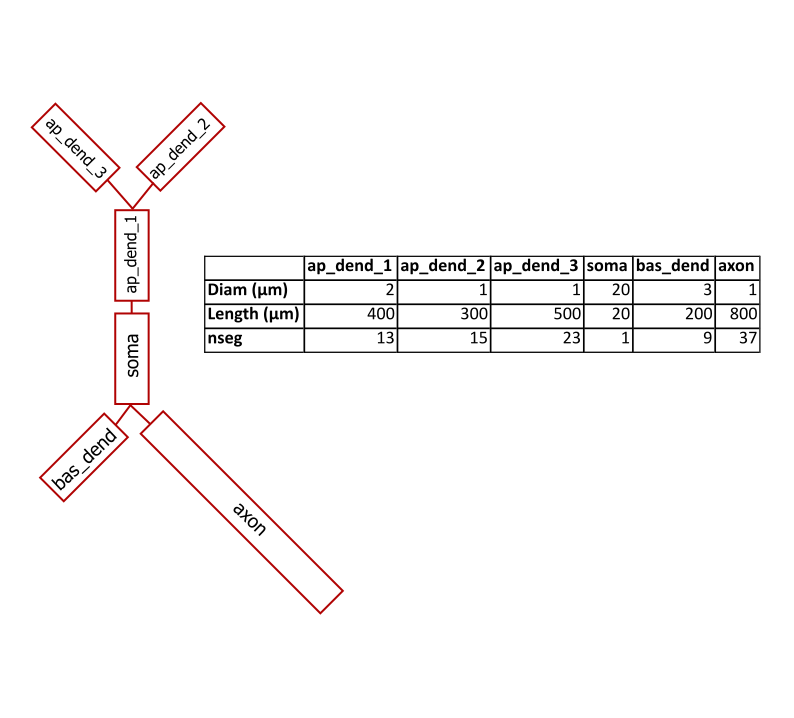

In [ ]:
soma_1 = h.Section(name="soma_1")
soma_1.L = 20
soma_1.diam = 20
soma_1.nseg = 1

ap_dend_1 = h.Section(name="ap_dend_1")
ap_dend_1.L = 400
ap_dend_1.diam = 2
ap_dend_1.nseg = 13

ap_dend_2 = h.Section(name="ap_dend_2")
ap_dend_2.L = 300
ap_dend_2.diam = 1
ap_dend_2.nseg = 15

ap_dend_3 = h.Section(name="ap_dend_3")
ap_dend_3.L = 300
ap_dend_3.diam = 1
ap_dend_3.nseg = 15

bas_dend = h.Section(name= "bas_dend")
bas_dend.L = 200
bas_dend.diam = 3
bas_dend.nseg = 9

axon = h.Section(name= "axon")
axon.L = 800
axon.diam = 1
axon.nseg = 10

dend_list1 = [ap_dend_1,ap_dend_2, ap_dend_3,bas_dend,axon]

ap_dend_1.connect(soma_1(1))
ap_dend_2.connect(ap_dend_1(1))
ap_dend_3.connect(ap_dend_1(1))
bas_dend.connect(soma_1(0))
axon.connect(soma_1(0))


axon

In [ ]:
del g

NameError: name 'g' is not defined

In [ ]:
ps2 = h.PlotShape(False)
ps2.plot(plotly).show(0)


We have created sections without providing any x,y,z coordinates. If you want to create anatomically detailed models you can place sections on 3D coordinate system.

refer to : _h.define_shape()_, _sec.pt3dchange()_


## Adding Mechanisms

- Density Mechanisms (e.g Ion Channels)
- Point Processes
    - Electrodes
    - Synapses

### Density Mechanisms

Two inbuilt mechanisms

- Hodgkin Huxley ("hh")
- leak current ("pas")

In [ ]:
h.hh.insert(soma)
h.pas.insert(dend_1)
h.pas.insert(dend_2)

# soma.insert("hh_custom")



### Accessing and modifying biophysical Variables

In [ ]:
for sec in h.allsec():
    sec.Ra = 160
    sec.cm = 1

print("Maximum sodium Conductance (S/cm2) ", soma(0.5).hh.gnabar)
print("Maximum pot Conductance (S/cm2): " , soma(0.5).hh.gkbar)

for seg in dend_1:
    seg.pas.g =  seg.pas.g*(1.15)

for seg in dend_2:
    seg.pas.g =  seg.pas.g*(1.15)

Maximum sodium Conductance (S/cm2)  0.12
Maximum pot Conductance (S/cm2):  0.036


# Point Process

In [ ]:
iclamp = h.IClamp(dend_1(1))
iclamp.delay = 50
iclamp.dur = 0.5
iclamp.amp = 0.6



## Add Recorders

In [ ]:
v_soma = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
v_dend_1 = h.Vector().record(dend_1(0.5)._ref_v)  # Membrane potential vector
v_dend_2 = h.Vector().record(dend_2(0.5)._ref_v)  # Membrane potential vector

t = h.Vector().record(h._ref_t)  # Time stamp vector


## Run simulation

In [ ]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)



0.0

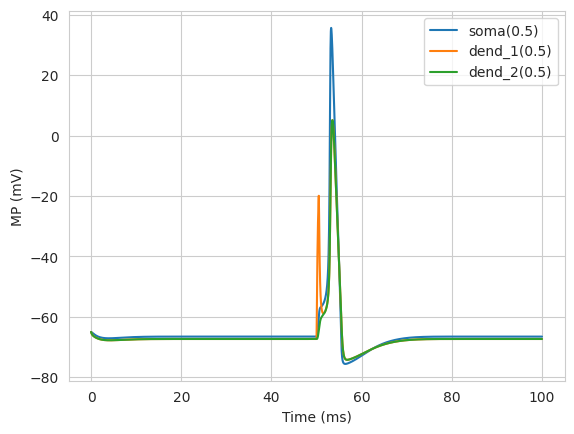

In [ ]:
fig,axs = plt.subplots()
axs.plot(t,v_soma,label="soma(0.5)")
axs.plot(t,v_dend_1,label="dend_1(0.5)")
axs.plot(t,v_dend_2,label="dend_2(0.5)")
axs.set(xlabel="Time (ms)",ylabel="MP (mV)")
plt.legend()


## Exercise 1b


- **Mechanisms**
    - Add hh to apicals, soma and axon.

    - Add pas to basal.
    
    - Set the following parameters
        - For basal, e_pas = -65

        - For apicals, gna_bar and gk_bar to 10% of its default value and set el to -64

        - Set Ra=160 ohm-cm and cm = 1 uF/cm2 for all sections.

- **Instrumentations**

    - Add Iclamp to apical dendrite 2.

    - Add recorder to record for time and voltage of soma, apical dendrite 1 and axon.

- Run simulation and plot all traces.

- **Bonus:** record sodium and potassium conductance

- **Bonus:** can you plot MP vs sections instead of time? look up RangeVar in the documentation.






In [ ]:
#exercise solution

h.hh.insert(soma_1)
h.hh.insert(ap_dend_1)
h.hh.insert(ap_dend_2)
h.hh.insert(ap_dend_3)

h.pas.insert(bas_dend)


In [ ]:
dir(bas_dend(0.5).pas)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'e',
 'g',
 'i',
 'is_ion',
 'name',
 'segment']

In [ ]:
for seg in bas_dend:
  seg.pas.e=-65

In [ ]:
for seg in ap_dend_1:
  seg.hh.gnabar = 0.1*seg.hh.gnabar
  seg.hh.gkbar = 0.1*seg.hh.gkbar
  seg.hh.el = -64

In [ ]:
for seg in ap_dend_2:
  seg.hh.gnabar = 0.1*seg.hh.gnabar
  seg.hh.gkbar = 0.1*seg.hh.gkbar
  seg.hh.el = -64

In [ ]:
for seg in ap_dend_3:
  seg.hh.gnabar = 0.1*seg.hh.gnabar
  seg.hh.gkbar = 0.1*seg.hh.gkbar
  seg.hh.el = -64

In [ ]:
for sec in h.allsec():
  sec.Ra = 160
  sec.cm = 1

In [ ]:
iclamp = h.IClamp(ap_dend_1(0.5))
iclamp.delay = 50
iclamp.dur = 10
iclamp.amp = 1

In [ ]:
v_soma_1 = h.Vector().record(soma_1(0.5)._ref_v)
v_ap_dend_1 = h.Vector().record(ap_dend_1(0.5)._ref_v)
v_axon = h.Vector().record(axon(0.5)._ref_v)

t = h.Vector().record(h._ref_t)

In [ ]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)

0.0

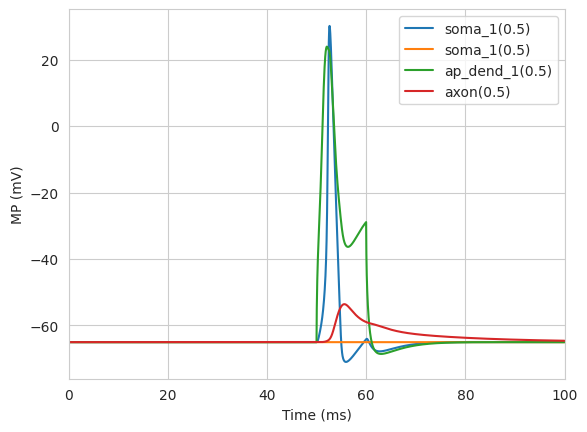

In [ ]:
fix, axs = plt.subplots()
axs.plot(t,v_soma_1,v_ap_dend_1,label="soma_1(0.5)")
axs.plot(t,v_ap_dend_1,label="ap_dend_1(0.5)")
axs.plot(t,v_axon,label="axon(0.5)")
axs.set(xlabel="Time (ms)",ylabel="MP (mV)")
plt.xlim(0,100)
plt.legend()


Exercise 2a : Adaptation (M-current)

In [ ]:
dend_1 = h.Section(name="dend_1")
dend_1.L = 20
dend_1.diam = 20
dend_1.nseg = 1

dend_2 = h.Section(name="dend_2")
dend_2.L = 20
dend_2.diam = 20
dend_2.nseg = 1

In [ ]:
h.hh.insert(dend_1)
h.hh_custom.insert(dend_2)

In [ ]:
iclamp = h.IClamp(dend_1(0.5))
iclamp.delay = 50
iclamp.dur = 150
iclamp.amp = 0.6

iclamp2 = h.IClamp(dend_2(0.5))
iclamp2.delay = 50
iclamp2.dur = 150
iclamp2.amp = 0.6

In [ ]:
v_dend_1 = h.Vector().record(dend_1(0.5)._ref_v)  # Membrane potential vector
v_dend_2 = h.Vector().record(dend_2(0.5)._ref_v)  # Membrane potential vector

t = h.Vector().record(h._ref_t)  # Time stamp vector

In [ ]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)

0.0

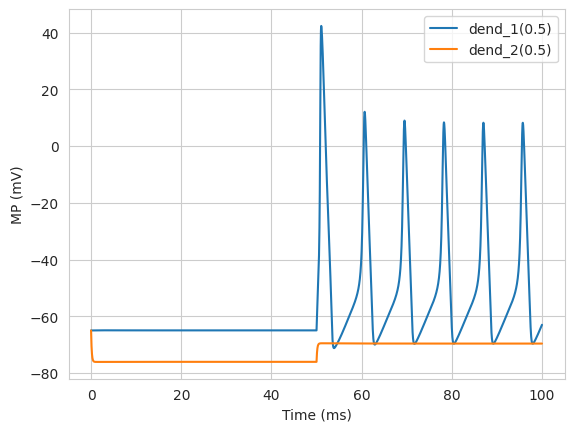

In [ ]:
fig,axs = plt.subplots()
axs.plot(t,v_dend_1,label="dend_1(0.5)")
axs.plot(t,v_dend_2,label="dend_2(0.5)")
axs.set(xlabel="Time (ms)",ylabel="MP (mV)")
plt.legend()